## Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Content
#### Attributes:

##### People

ID: Customer's unique identifier  
Year_Birth: Customer's birth year  
Education: Customer's education level  
Marital_Status: Customer's marital status  
Income: Customer's yearly household income  
Kidhome: Number of children in customer's household  
Teenhome: Number of teenagers in customer's household  
Dt_Customer: Date of customer's enrollment with the company  
Recency: Number of days since customer's last purchase  
Complain: 1 if the customer complained in the last 2 years, 0 otherwise  

##### Products

MntWines: Amount spent on wine in last 2 years  
MntFruits: Amount spent on fruits in last 2 years 
MntMeatProducts: Amount spent on meat in last 2 years  
MntFishProducts: Amount spent on fish in last 2 years  
MntSweetProducts: Amount spent on sweets in last 2 years  
MntGoldProds: Amount spent on gold in last 2 years  

##### Promotion

NumDealsPurchases: Number of purchases made with a discount  
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  

##### Place

NumWebPurchases: Number of purchases made through the company’s website  
NumCatalogPurchases: Number of purchases made using a catalogue  
NumStorePurchases: Number of purchases made directly in stores  
NumWebVisitsMonth: Number of visits to company’s website in the last month  

###### Target
Need to perform clustering to summarize customer segments.  

###### Acknowledgement
The dataset for this project is provided by Dr. Omar Romero-Hernandez.  

In [95]:
#IMPORT THE LIBRARIES....
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
%matplotlib inline
import seaborn as sns
import matplotlib
from datetime import date
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [96]:
d=pd.read_csv('marketing_campaign.csv',sep='\t')
d.head(5).style.background_gradient(cmap='Blues')

In [97]:
#SHAPE OF THE DATASET.....
print("Shape of the DataFrame is :",d.shape)

Shape of the DataFrame is : (2240, 29)


In [98]:
#CHECK THE COLUMNS NAME....
print("Columns in DataFrame is :\n",d.columns)

Columns in DataFrame is :
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [99]:
#PRINT THE COMPLETE INFORMATION OF THE DATASET.....
print("Summary of a Dataframe is :\n\n")
d.info()

Summary of a Dataframe is :


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDeals

# Basic statistics:-

In [100]:
#LETS DO THE BASIC STATISTICS ON CONTINOUS FEATURES...
d.describe().style.background_gradient(cmap='Blues')

# Detecting the missing values:-

In [101]:
#PERCENTAGE OF THE MISSING VALUES - DATAFRAME..... 
def missing_data(d):
    total = d.isnull().sum().sort_values(ascending = False)
    Percentage = (d.isnull().sum()/d.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(d).style.background_gradient(cmap='Blues')

<AxesSubplot:>

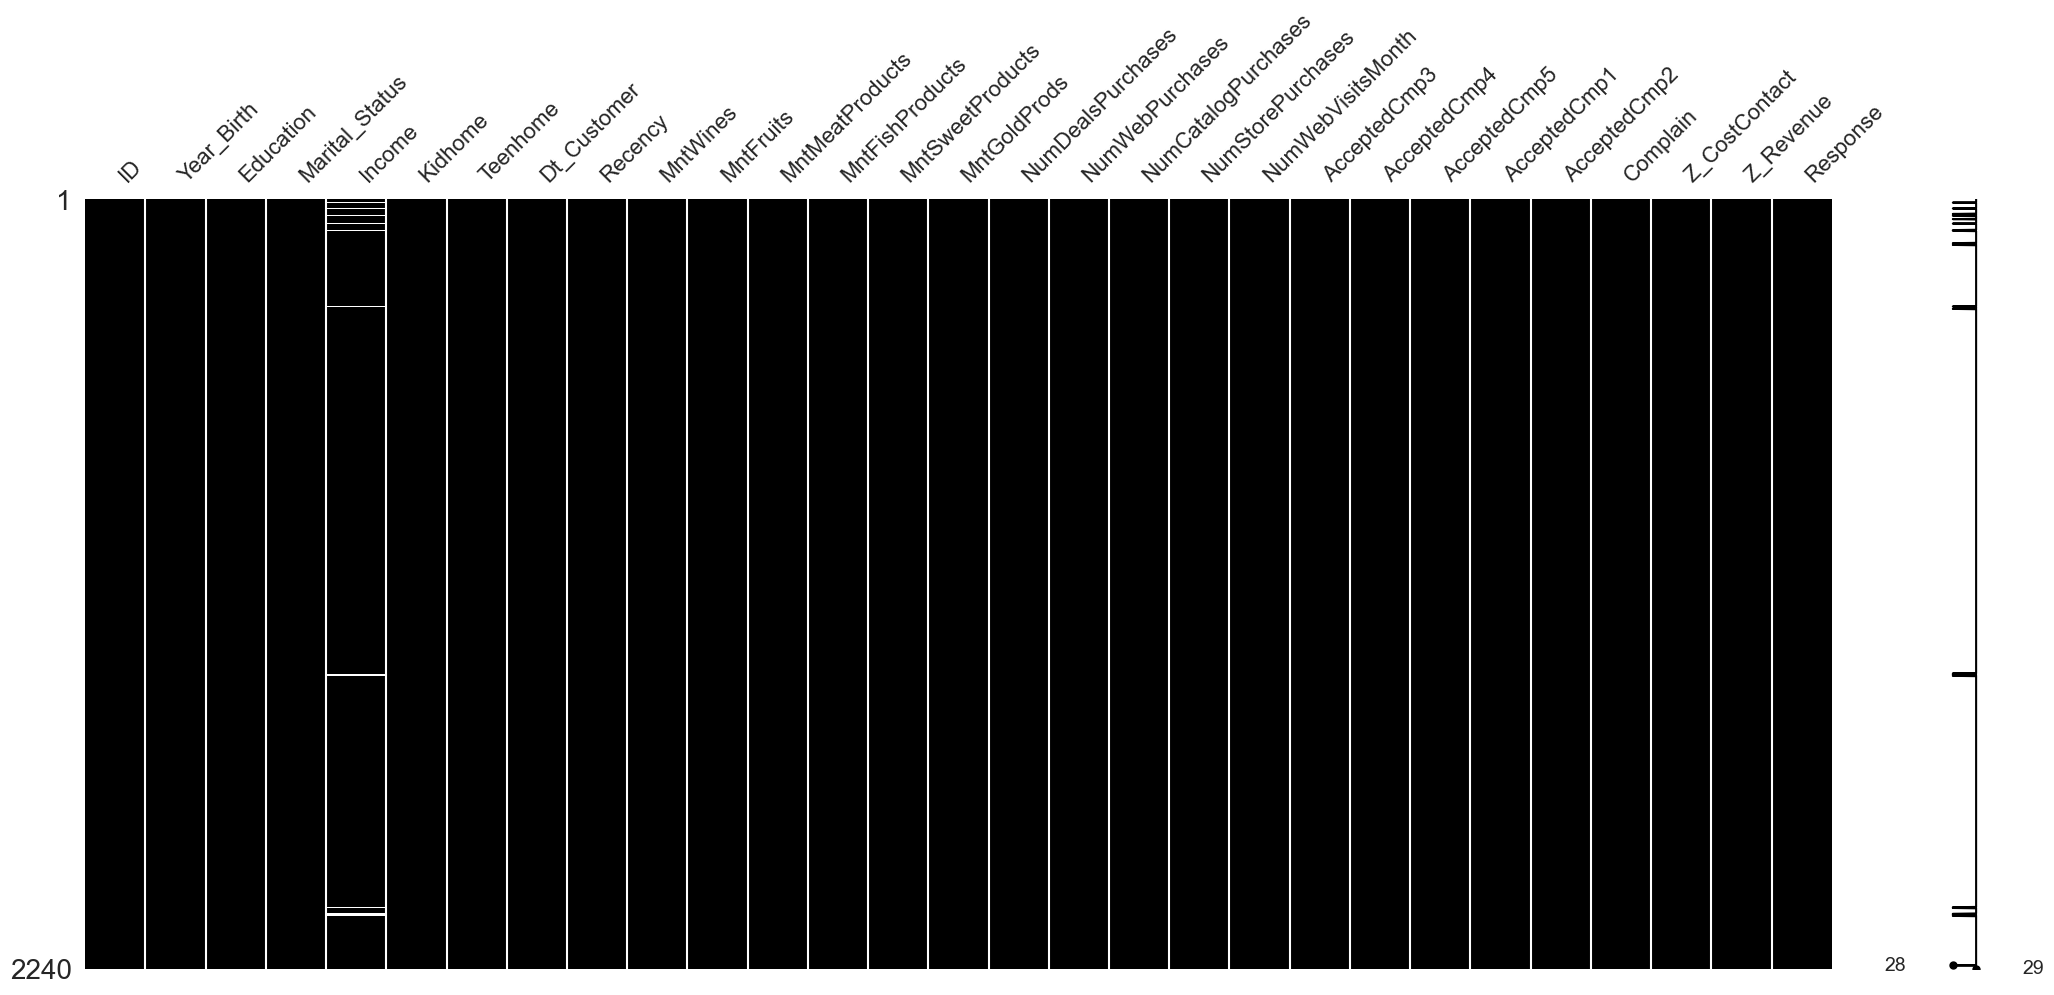

In [102]:
#LETS VISUALISE THE MISSING VALUES PRESENT IN THE DATASET..
import missingno as mn
mn.matrix(d,color = (0,0,0))

In [103]:
#FILL THE MISSING VALUES WITH THE MEDIAN VALUES.. 
d['Income']=d['Income'].fillna(d['Income'].median())
d['Income'].isnull().sum()

0

All the null values have been replaced with mean value in the income column..

In [104]:
#CHECKING IF ANY NAN IS PRESENT IN COLUMN OR NOT....
d.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

There is no NAN value present in any column..

# Detecting the duplicates:-

In [105]:
d[d.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

In [106]:
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
d.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Note:-In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why , they are not going to contribute anything in the model building. So we can drop them.

# Droping the unwanted feature:-

In [107]:
d=d.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
d.head(5).style.background_gradient(cmap='Blues')

# Univariate Analysis :-

### 1.Analysis on Year_Birth Variable.

In [108]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Year_Birth"
print("Unique categories present in the Year_Birth:",d["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: 1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64


### 2.Analysis On Education Variable.

In [109]:
d['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

There are 5 category of educational qualification that customer posses in this dataset.
We can bring it down to two common category for our convenient.

In [110]:
#CHANGING CATEGORY INTO "UG" AND "PG" ONLY....
d['Education'] = d['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
d['Education'].value_counts()

Post Graduate    2186
Basic              54
Name: Education, dtype: int64

<Figure size 800x800 with 0 Axes>

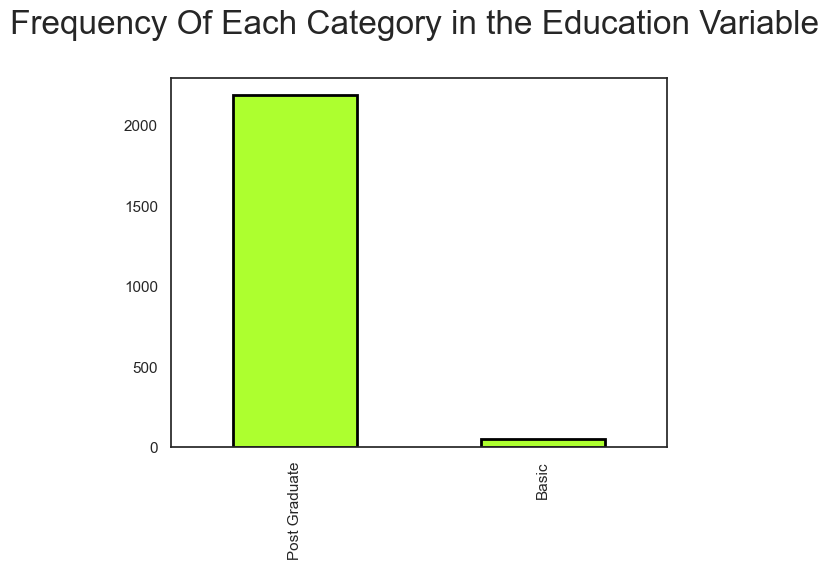

<Figure size 800x800 with 0 Axes>

In [111]:
#VISUALIZING THE "Education"
d['Education'].value_counts().plot(kind='bar',color = 'greenyellow',edgecolor = "black",linewidth = 2)
plt.title("Frequency Of Each Category in the Education Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

**NOTE:**   
**_97.58% of Customers in the dataset are "Post Graduate".   
2.410% of Customers in the dataset are "Under Graduate"._**   

### 3.Analysis On Marital_Status Variable.

In [112]:
d['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

There are 8 unique features in the Marital status column.We shall narrow down the different classes to 2 categories  'Relationship' and 'Single'.

In [113]:
#REPLACING THE CONFLICT VALUES IN Marital_status..
d['Marital_Status'] = d['Marital_Status'].replace(['Married', 'Together'],'Relationship')
d['Marital_Status'] = d['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')
d['Marital_Status'].value_counts()

Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

<Figure size 800x800 with 0 Axes>

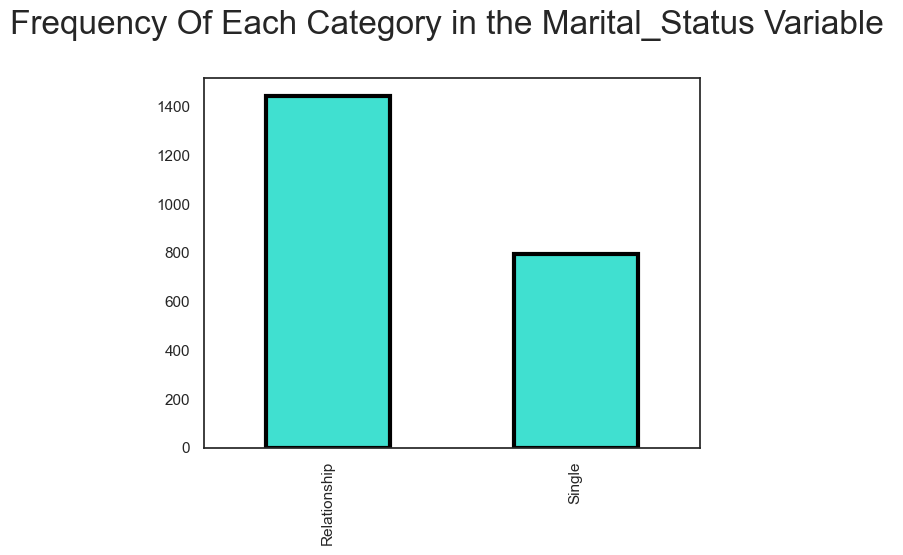

<Figure size 800x800 with 0 Axes>

In [114]:
#VISUALIZING THE "Marital_Status"
d['Marital_Status'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Marital_Status Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

**NOTE:**  
**_64.46% of Customers in the dataset are in "Relationship".  
35.53% of Customers in the dataset are "Single"._**  

###  4.Analysis On Income Variable.

In [115]:
#Maximum Income
print("Maximum income in the dataset :", d['Income'].max())
#Minimum Income
print("Minimum income in the dataset :", d['Income'].min())
#AverageIncome
print("Average income in the dataset :",d['Income'].mean())
d['Income'].describe()

Maximum income in the dataset : 666666.0
Minimum income in the dataset : 1730.0
Average income in the dataset : 52237.97544642857


count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

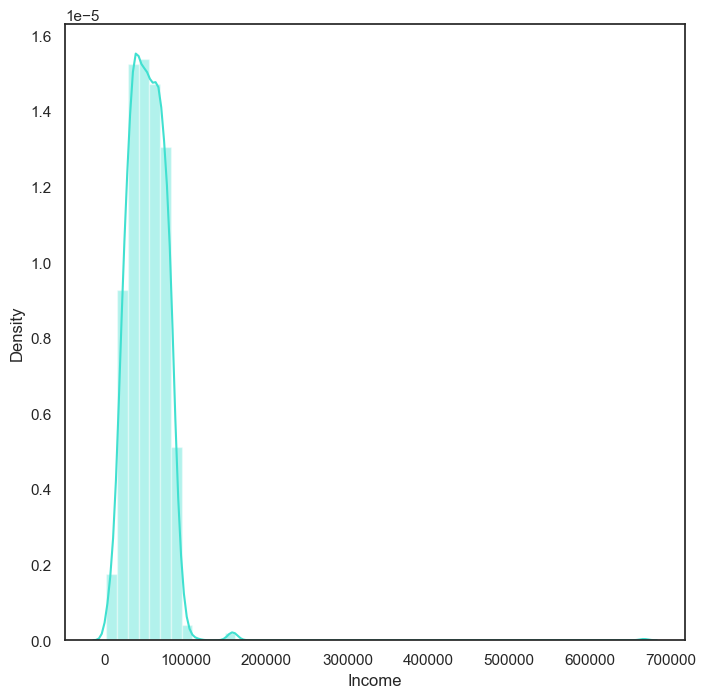

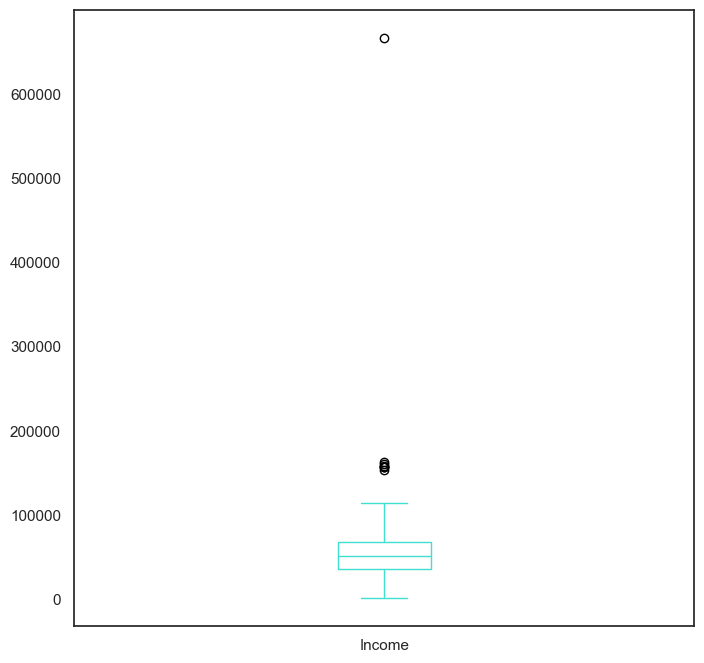

In [116]:
plt.figure(figsize=(8,8))
sns.distplot(d["Income"],color = 'turquoise')
plt.show()
d["Income"].plot.box(figsize=(8,8),color = 'turquoise')
plt.show()

### 5.Analysis On "Kidhome,Teenhome" Variable.

In [117]:
d['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

In [118]:
d['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

In [119]:
# Combining different dataframe into a single column to reduce the number of dimension

d['Kids'] = d['Kidhome'] + d['Teenhome']
d['Kids'].value_counts()

1    1128
0     638
2     421
3      53
Name: Kids, dtype: int64

<Figure size 800x800 with 0 Axes>

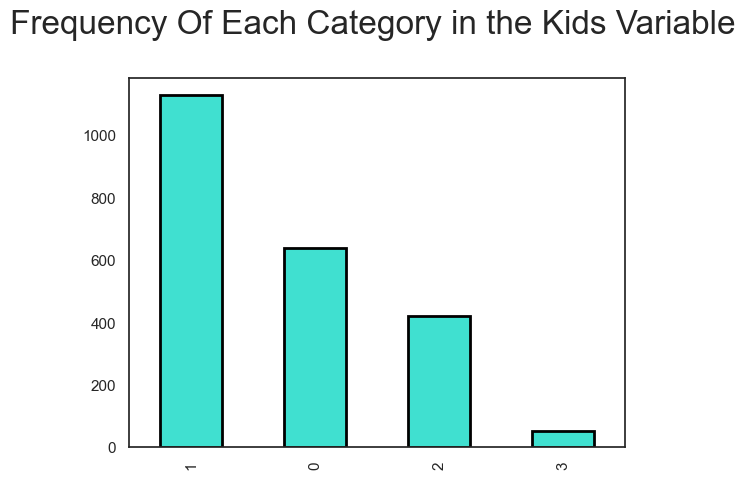

<Figure size 800x800 with 0 Axes>

In [120]:
#VISUALIZING THE "Kids"
d['Kids'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 2)
plt.title("Frequency Of Each Category in the Kids Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

**_NOTE:  
50.35% of Customers in the dataset have 1 kid.  
28.48% of Customers in the dataset have no kids.  
18.79% of Customers in the dataset have 2 kids.  
2.36% of Customers in the dataset have 3 kids_**  

### 6.Analysis On "MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,  MntGoldProds" Variable.

In [121]:
d['MntWines'].unique()

array([ 635,   11,  426,  173,  520,  235,   76,   14,   28,    5,    6,
        194,  233,    3, 1006,   53,   84, 1012,    4,   86,    1,  867,
        384,  270,   36,  684,    8,  112,  110,   96,  482,   40,  702,
         55,  437,  421,   13,    9,   81,  123,   48,  826,  245,  650,
         12,  510,  328,  984,  295,  447,  712,  452,  523,  546,  398,
         10,  688,  247,  856,  496,   25,  258,  565,    2,  721, 1032,
        577,   64,  163,   17,  130,  292,  350,  135,  230,    7,  445,
         15,   27,  505,   51,  207,   41,  386,  562,  217,  144,  454,
        425, 1332,  527,  490,  378,  547,   47,  320,   34,  722,  162,
        450,   70,  352,  492,  120,  534,  236,  231,  220,  796,    0,
        962,  738,  399,  614,   32,  598,   73,   42,  346,  888,  997,
        212,  536, 1349, 1001,   20,   18,  125,  277,   85,   59, 1149,
        847,   29,  152,  620,   35,  356,  783,  466,   23,  656,  519,
        344,  448,  265,  587,  763,   22,   54, 11

In [122]:
d['MntWines'].value_counts()

2       42
5       40
1       37
6       37
4       33
8       30
3       30
9       28
12      25
10      24
14      24
11      23
7       22
15      22
19      21
23      18
18      18
16      17
30      16
22      16
29      14
13      14
25      14
0       13
24      12
27      11
20      11
34      10
28      10
56      10
26      10
35      10
17       9
31       9
68       9
32       8
38       8
46       8
40       8
39       8
112      8
37       8
162      8
167      7
45       7
51       7
292      7
378      6
483      6
135      6
410      6
70       6
73       6
21       6
62       6
67       6
43       6
267      6
587      6
158      6
42       6
635      6
33       6
173      6
172      6
53       6
63       6
48       6
398      6
620      5
293      5
81       5
85       5
97       5
656      5
99       5
182      5
154      5
199      5
80       5
138      5
520      5
71       5
100      5
163      5
350      5
445      4
159      4
57       4
387      4
179      4

In [123]:
d['MntFruits'].unique()

array([ 88,   1,  49,   4,  43,  42,  65,  10,   0,   5,  16,  61,   2,
        14,  22,  80,  17,   3, 100,  12,  34,   8,  76,  11, 164,  18,
         6,  50,  19,  37, 120,   9,  51,  35,  26,   7,  40,  59,  36,
       107, 111, 105,  23,  60,  46, 172,  81, 106, 194, 115,  44,  99,
        90,  48,  27,  33, 133,  58,  28,  21,  20, 162,  71,  66,  30,
       189, 138,  29,  24,  32,  86, 114, 153,  64, 134, 148,  47,  41,
        84,  74, 129,  15,  98, 183, 147, 144, 104,  91, 163, 152,  53,
        68, 137, 190,  38,  70,  96,  25,  13,  83,  92,  73, 155,  54,
       151,  85, 127,  63,  45, 103,  69,  89, 181, 112, 159, 102, 123,
       166, 142,  79,  39,  31, 178,  93,  97, 168, 174, 122, 199,  62,
        55, 101,  67, 117, 108,  57, 130, 161,  56, 124, 126,  75, 185,
        72,  87, 197,  82, 184, 160,  77, 140, 131, 132, 169, 193, 149,
       143, 154], dtype=int64)

In [124]:
d['MntFruits'].value_counts()

0      400
1      162
2      120
3      116
4      104
7       67
5       65
6       62
12      50
8       48
10      42
17      35
9       35
19      29
11      29
15      29
16      26
21      26
35      25
28      25
14      23
26      22
23      21
22      18
24      17
13      17
80      15
42      14
33      14
61      14
20      14
44      13
53      12
32      12
27      12
25      12
48      11
50      11
38      11
43      11
47      10
18      10
30      10
51      10
31       9
36       9
34       9
138      8
76       8
40       8
129      8
29       8
107      8
71       7
73       7
54       7
64       7
59       7
45       6
72       6
81       6
114      6
60       6
66       6
83       6
86       6
37       6
134      5
91       5
105      5
58       5
70       5
63       5
108      5
172      5
46       5
120      5
161      5
102      5
68       4
137      4
112      4
142      4
55       4
84       4
153      4
93       4
162      4
98       4
115      4
39       3

In [125]:
d['MntMeatProducts'].unique()

array([ 546,    6,  127,   20,  118,   98,  164,   56,   24,   11,  480,
         53,   17,  115,   19,   38,  498,   73, 1725,   86,  102,   27,
         25,   30,    3,   42,  801,   10,   44,    5,   96,  471,  151,
         14,  206,  536,   29,   50,  266,   15,   48,  317,  125,  780,
        550,  124,  432,  482,    8,   22,   28,  538,  134,  367,    1,
        309,  159,  487,  460,   43,  291,   65,   13,  925,  779,   64,
         68,  424,   16,   37,  568,   39,  192,  359,   26,    7,  447,
         92,  183,  276,  690,   32,  271,   31,  106,  292,  311,   21,
        101,  812,   94,  133,  951,  110,   47,  189,  196,   33,  590,
         34,   12,  921,  232,  756,  132,   41,  141,   18,   90,   78,
         57,  269,   69,  387,  249,   49,  240, 1582,  305,  449,  119,
        195,    2,  107,  537,   45,  813,   79,  553,  337,  138,  113,
        320,  319,   59,  554,  171,    4,  417,  162,  540,  154,  207,
        204,  740,    9,  137,  184,  464,  757,  5

In [126]:
d['MntMeatProducts'].value_counts()

7       53
5       50
11      49
8       46
6       43
10      40
3       40
9       38
16      36
12      35
13      30
2       30
4       30
15      30
21      27
14      27
19      26
18      25
24      23
17      22
22      17
23      17
27      16
30      16
20      16
26      16
25      15
29      14
1       14
28      13
44      12
68      12
69      12
56      12
133     11
31      11
100     10
33      10
39      10
64      10
217     10
46       9
92       9
59       9
76       9
125      9
57       9
38       9
106      9
45       9
35       9
43       8
54       8
83       8
37       8
48       8
71       8
52       8
124      8
142      8
50       8
137      8
134      8
61       7
171      7
66       7
53       7
115      7
73       7
32       7
107      7
108      7
47       7
60       7
215      6
101      6
40       6
49       6
249      6
34       6
204      6
102      6
239      6
259      6
161      6
82       6
265      6
65       6
168      6
118      6
447      6

In [127]:
d['MntFishProducts'].unique()

array([172,   2, 111,  10,  46,   0,  50,   3,   1,  11, 225,   6,  59,
       150,  30,  69,  21,  39,  15,  20,  34,  33, 119, 160,  82, 227,
        37,  27, 156,  12, 180, 121,  16, 201,   7,  58, 189,  17,  84,
         4,  97, 137, 110,  49,  98,  75,  65, 185,  80,  31,  23,  29,
       151, 123,  44,  40, 173,  38,  52,  13,  36,  43,  73,  32,   8,
        19, 149, 134,  86, 140, 147, 224,  42,  76,  47, 254,  25,  67,
        28, 186, 218, 104, 133, 220,  45,  24, 205, 162,  95, 101, 188,
        55, 166, 216,  60, 219,  77,  78,  72, 212, 129,  93,  99, 102,
       179,  61,  62, 197, 199, 120, 169, 240,  63,  91, 106, 146,  56,
       127, 136, 168,  54, 132,  71,  64, 231,  85, 202,  41, 125,  26,
       175, 164, 177, 138, 247, 159, 153,  90,  51, 234,  68, 210,  89,
       194, 250, 237, 145, 167,  48, 192, 130, 232, 116, 184, 158,  94,
       259, 115, 207, 112, 182, 141, 124, 171, 193, 242, 246,  35, 142,
       253, 258, 198, 223,   5, 103, 108, 181,  81, 128, 208, 11

In [128]:
d['MntFishProducts'].value_counts()

0      384
2      156
3      130
4      108
6       82
7       66
8       58
10      55
13      48
12      47
11      46
15      38
19      36
20      35
16      35
17      27
23      27
21      22
29      20
28      19
25      18
32      17
34      16
33      16
39      16
65      15
50      15
104     14
38      14
69      14
30      13
80      13
46      12
75      12
43      11
52      11
55      11
42      11
24      11
63      11
58      10
37      10
150     10
99      10
1       10
71       9
60       9
84       9
45       8
49       8
36       8
94       8
62       8
119      7
106      7
160      7
168      7
93       7
26       7
86       6
59       6
78       6
91       6
76       6
54       6
138      6
97       6
110      6
145      6
151      6
41       6
40       6
64       5
72       5
111      5
123      5
179      5
120      5
133      5
51       5
149      5
210      5
82       5
67       5
116      5
73       5
56       5
27       5
90       5
180      5
85       4

In [129]:
d['MntSweetProducts'].unique()

array([ 88,   1,  21,   3,  27,  42,  49,   2, 112,   5,  68,  13,  12,
        16,  24,  38,   0,  32,   6, 263,  66,  22,   8,   7, 178,  30,
        10,  67, 167,  40, 120,  18,  14, 122,  82,  29,  60,   4,  37,
        15, 105,  65, 133,  28,  61, 132,  26,  98,  35,  51,  20, 103,
         9,  72,  89,  41,  71,  44,  33,  11,  91,  76,  17, 113,  19,
       173,  23,  87, 176, 102,  48, 138, 163, 124,  70, 172,  84, 149,
        73,  92, 130,  25,  74, 114, 141,  54, 147,  45,  50,  46,  97,
        64, 118, 153, 189, 107, 128, 134,  36, 150,  78, 137,  34,  95,
       156,  47, 194,  96, 191, 192,  75,  62,  58, 129,  31,  57, 108,
       123, 185, 121, 127, 125, 198,  43, 115,  80, 106, 101, 110,  83,
       160, 166, 136,  56, 116, 182, 148, 161,  69, 157,  55, 143, 169,
        86, 146,  59, 152,  77,  53,  39,  93, 151,  99, 144, 195,  63,
       175, 145, 162, 187, 126,  85, 109, 197, 165, 174, 196,  81, 139,
       188, 142,  94, 262, 179, 100,  79, 111], dtype=int64)

In [130]:
d['MntSweetProducts'].value_counts()

0      419
1      161
2      128
3      101
4       82
5       65
6       64
7       57
8       56
12      45
9       42
14      41
10      38
13      31
15      28
11      26
24      24
21      24
30      23
17      23
26      22
19      20
20      20
16      19
35      18
38      17
28      17
23      15
22      14
29      13
18      13
40      13
32      13
44      12
54      11
45      10
42      10
61      10
25      10
48       9
33       9
80       9
50       9
66       9
27       9
49       9
31       9
43       9
58       8
91       8
107      8
34       8
41       7
92       7
56       7
46       7
37       7
76       7
102      6
36       6
138      6
47       6
72       6
89       6
133      6
51       6
59       6
98       6
60       5
151      5
71       5
97       5
118      5
57       5
53       5
137      5
112      5
69       5
55       5
82       4
67       4
68       4
95       4
75       4
64       4
39       4
78       4
143      4
105      4
74       4
161      4

In [131]:
d['MntGoldProds'].unique()

array([ 88,   6,  42,   5,  15,  14,  27,  23,   2,  13,   1,  16,  30,
        45,   4,  28, 176,  39,  48,  19,  99,  41, 362,  10,   0,  89,
         3,  43,  22,  35,  36, 102,   7,  12, 174,  50,  38,  32, 241,
       109, 190,  40,  80, 169,  73,  17,  86,   9,  18,  51,  76,  34,
       145,  53,  75, 223,  11, 111,  81,  65,  79,  60,  72,  33, 120,
       168, 172, 216,  58, 130, 124,  20, 126, 116,  49,   8,  91,  57,
        26, 141, 117,  25,  92,  54,  21, 192,  44,  66, 182, 181, 152,
        77,  70, 148,  24,  69, 146, 162, 131,  74, 135, 203,  52,  63,
        61, 139, 122, 224, 173, 218,  93, 142,  29, 233, 101, 157,  55,
       107, 159,  78, 110, 125, 114,  68, 191,  95,  37,  64,  46, 119,
        90, 134, 108, 153,  84,  59,  31, 175,  85,  71,  47, 118,  83,
       106, 165, 163, 144, 147, 207, 151, 154, 115,  67, 242, 155, 249,
       183, 170,  97, 227, 121, 205, 112, 198, 177, 133,  94,  56,  82,
       187, 171,  98, 129,  96, 166, 195, 231, 158, 123, 200, 17

In [132]:
d['MntGoldProds'].value_counts()

1      73
4      70
3      69
5      63
12     63
2      62
0      61
6      57
7      54
10     49
15     48
11     46
9      44
20     43
8      40
17     36
14     35
18     34
26     32
27     31
16     31
30     31
13     30
38     27
42     27
24     27
21     26
34     24
28     23
19     22
35     22
22     22
32     21
29     20
40     20
54     20
33     20
41     19
23     19
36     18
43     17
25     16
45     16
37     16
31     15
48     15
39     13
57     13
50     13
80     12
53     12
47     12
76     12
66     11
46     10
44     10
107    10
61     10
49      9
108     9
58      9
89      9
64      9
56      9
63      8
88      8
51      8
99      7
52      7
70      7
92      7
91      7
172     7
93      7
84      6
83      6
241     6
73      6
102     6
97      6
126     6
125     6
75      6
133     6
153     6
191     6
79      6
95      6
59      6
182     5
117     5
145     5
72      5
65      5
134     5
71      5
55      5
82      5
174     5
114     5


In [133]:
# Combining different dataframe into a single column to reduce the number of dimension

d['Expenses'] = d['MntWines'] + d['MntFruits'] + d['MntMeatProducts'] + d['MntFishProducts'] + d['MntSweetProducts'] + d['MntGoldProds']
d['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [134]:
#Minimum Expenses
print('Minimum Expenses',d['Expenses'].min())

#Maximum Expenses
print('Maximum Expenses',d['Expenses'].max())

#Average Expenses
print('Average Expenses',d['Expenses'].mean())

Minimum Expenses 5
Maximum Expenses 2525
Average Expenses 605.7982142857143


In [135]:
d['Expenses'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenses, dtype: float64

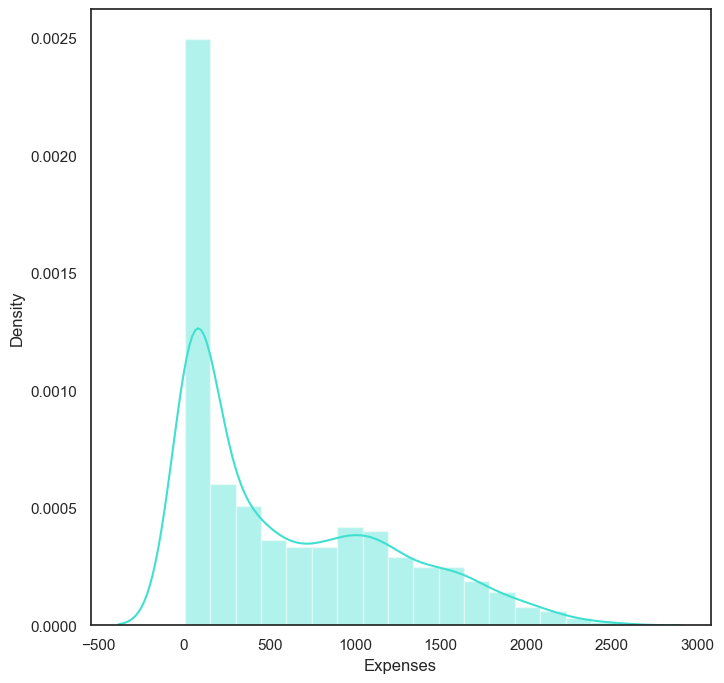

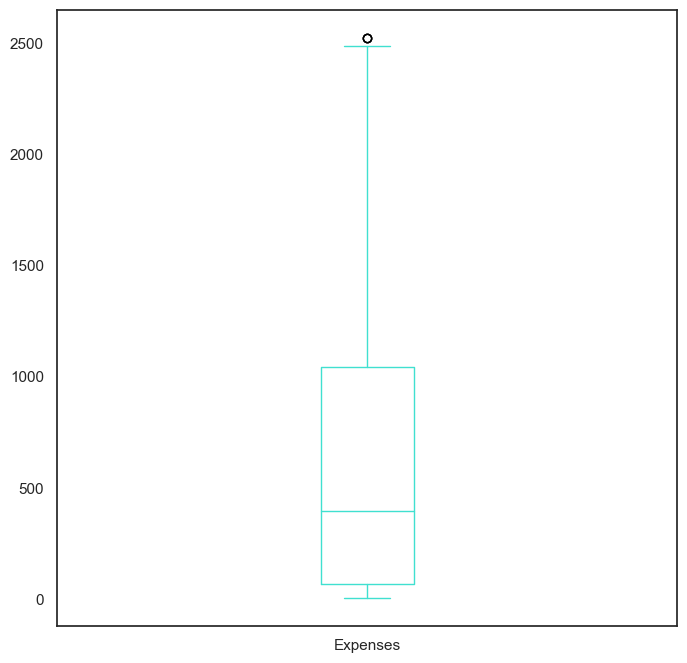

In [136]:
plt.figure(figsize=(8,8))
sns.distplot(d["Expenses"],color = 'turquoise')
plt.show()
d["Expenses"].plot.box(figsize=(8,8),color='turquoise')
plt.show()

### 7.Analysis on "AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,  AcceptedCmp5" Variable.

In [137]:
d['AcceptedCmp1'].unique()

array([0, 1], dtype=int64)

In [138]:
d['AcceptedCmp2'].unique()

array([0, 1], dtype=int64)

In [139]:
d['AcceptedCmp3'].unique()

array([0, 1], dtype=int64)

In [140]:
d['AcceptedCmp4'].unique()

array([0, 1], dtype=int64)

In [141]:
d['AcceptedCmp5'].unique()

array([0, 1], dtype=int64)

In [142]:
d['TotalAcceptedCmp'] = d['AcceptedCmp1'] + d['AcceptedCmp2'] + d['AcceptedCmp3'] + d['AcceptedCmp4'] + d['AcceptedCmp5']

#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "TotalAcceptedCmp"
print("Unique categories present in the TotalAcceptedCmp:",d['TotalAcceptedCmp'].value_counts())
print("\n")

Unique categories present in the TotalAcceptedCmp: 0    1777
1     325
2      83
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64




<Figure size 800x800 with 0 Axes>

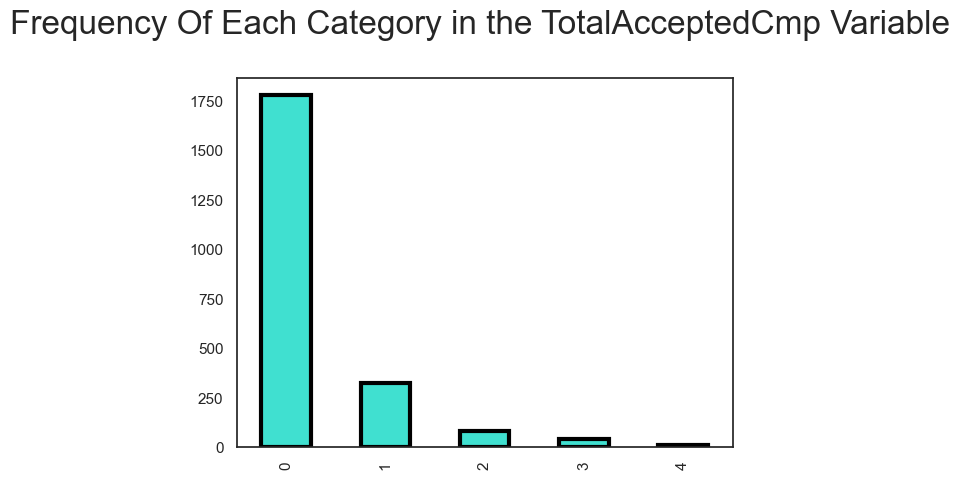

<Figure size 800x800 with 0 Axes>

In [143]:
#VISUALIZING THE "TotalAcceptedCmp"
d['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

**_NOTE:  
79.33% of Customers accepted the offer in the campaign are "0".  
14.50% of Customers accepted the offer in the campaign are "1".  
3.70% of Customers accepted the offer in the campaign are "2".  
1.96% of Customers accepted the offer in the campaign are "3".  
0.49% of Customers accepted the offer in the campaign are "4"._**  

# 8.Analysis on "NumWebPurchases,NumCatalogPurchases,  NumStorePurchases,NumDealsPurchases" Variable.

In [144]:
d['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25],
      dtype=int64)

In [145]:
d['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22],
      dtype=int64)

In [146]:
d['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1],
      dtype=int64)

In [147]:
d['NumDealsPurchases'].unique()

array([ 3,  2,  1,  5,  4, 15,  7,  0,  6,  9, 12,  8, 10, 13, 11],
      dtype=int64)

In [148]:
d['NumTotalPurchases'] = d['NumWebPurchases'] + d['NumCatalogPurchases'] + d['NumStorePurchases'] + d['NumDealsPurchases']
d['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [149]:
#Minimum NumTotalPurchases
print('Minimum NumTotalPurchases :',d['NumTotalPurchases'].min())

#Maximum NumTotalPurchases
print('Maximum NumTotalPurchases :',d['NumTotalPurchases'].max())

#Average NumTotalPurchases
print('Average NumTotalPurchases :',d['NumTotalPurchases'].mean())

Minimum NumTotalPurchases : 0
Maximum NumTotalPurchases : 44
Average NumTotalPurchases : 14.862053571428572


In [150]:
d['NumTotalPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

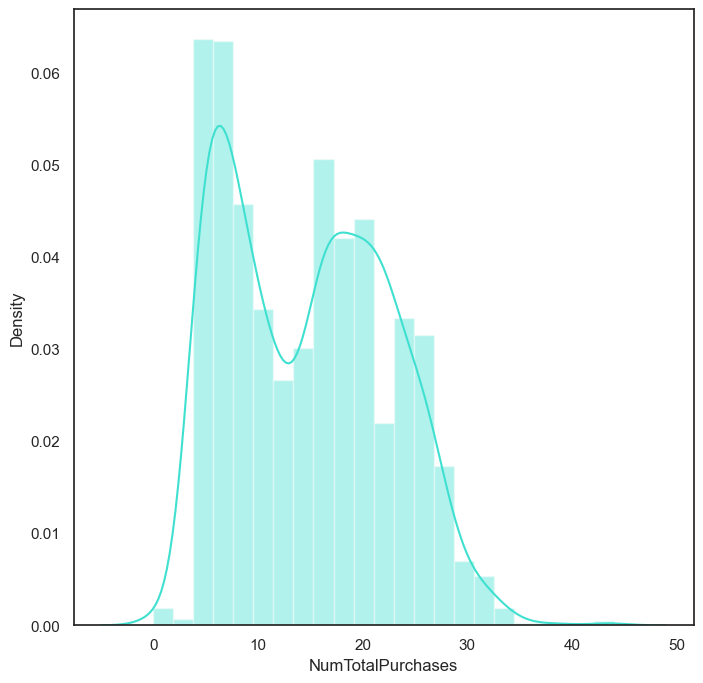

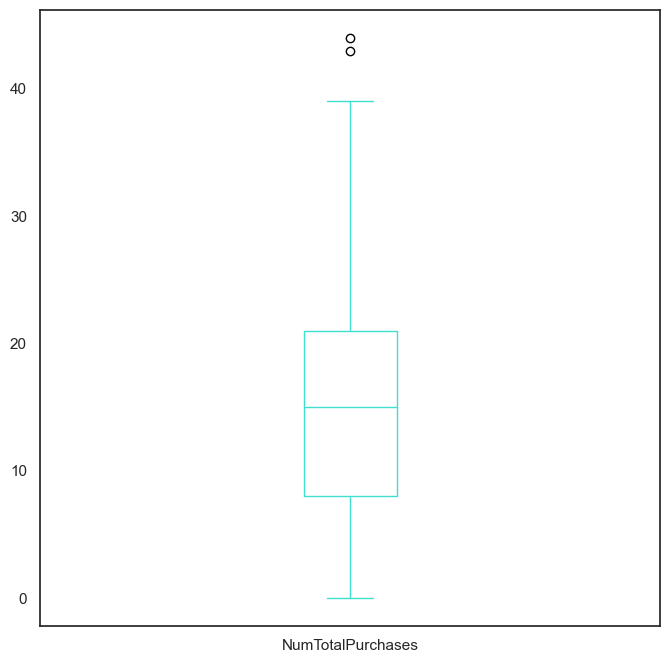

In [151]:
plt.figure(figsize=(8,8))
sns.distplot(d["NumTotalPurchases"],color = 'turquoise')
plt.show()
d["NumTotalPurchases"].plot.box(figsize=(8,8),color = 'turquoise')
plt.show()

In [152]:
d.head()

ID  Year_Birth      Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Post Graduate         Single  58138.0        0         0   
1  2174        1954  Post Graduate         Single  46344.0        1         1   
2  4141        1965  Post Graduate   Relationship  71613.0        0         0   
3  6182        1984  Post Graduate   Relationship  26646.0        1         0   
4  5324        1981  Post Graduate   Relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Kids  Expenses  TotalAcceptedCmp  NumTotalPurchases  
0     0      1617                 0                 25  
1     2        27                 0                  6  
2     0       776                 0                 21  
3     1        53                 0                  8  
4     1       422                 0                 19

In [153]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
d=d.drop(columns=col_del,axis=1)
d.head(10).style.background_gradient(cmap='Greys')

In [154]:
print('List of columns after dropping unwanted features:  \n')
x = d.columns 
for i in x:
     print(i)

List of columns after dropping unwanted features:  

Year_Birth
Education
Marital_Status
Income
Dt_Customer
Recency
Complain
Response
Kids
Expenses
TotalAcceptedCmp
NumTotalPurchases


In [155]:
#NUMBER OF DAYS A CUSTOMER WAS ENGAGED WITH COMPANY...... 
#CHANGING "Dt_customer" into timestamp format......

d['Dt_Customer'] = pd.to_datetime(d.Dt_Customer)
d['First_day'] = '01-01-2015'
d['First_day'] = pd.to_datetime(d.First_day)
d['Day_engaged'] = (d['First_day'] - d['Dt_Customer']).dt.days

Unique categories present in the Age: 10    1189
9      557
11     494
Name: Age, dtype: int64




<Figure size 800x800 with 0 Axes>

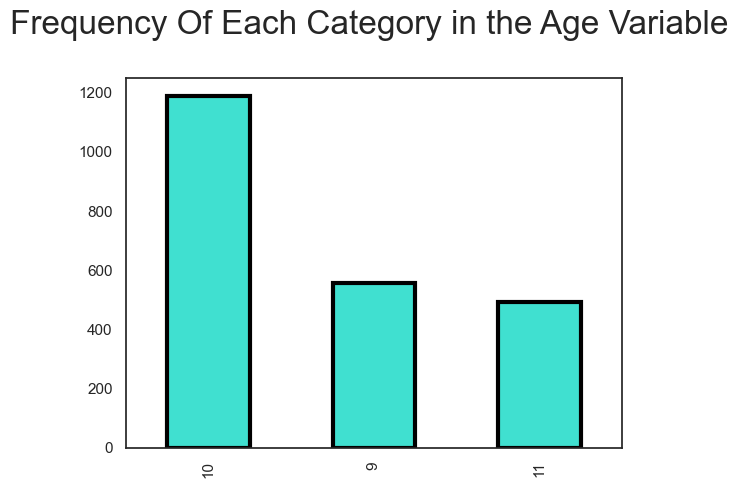

<Figure size 800x800 with 0 Axes>

In [156]:
#ADDING A COLUMN "Age" IN THE DATAFRAME....
d['Age'] = (pd.Timestamp('now').year) - (pd.to_datetime(d['Dt_Customer']).dt.year)

#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Age"
print("Unique categories present in the Age:",d['Age'].value_counts())
print("\n")


#VISUALIZING THE "Age"
d['Age'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Age Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

**_NOTE:  
53.08% are 10 years old customers.  
24.86% are 9 years old customers.  
22.05% are 11 years old customers._**  

In [157]:
d.head(5).style.background_gradient(cmap='Blues')

In [158]:
d=d.drop(columns=["Dt_Customer", "First_day", "Year_Birth", "Dt_Customer", "Recency", "Complain","Response"],axis=1)
d.head(5).style.background_gradient(cmap='Blues')

In [159]:
#REARRANGE THE ORDER OF COLUMNS:-
order = [0,1,3,4,6,7,8,2,5]
d = d[[d.columns[i] for i in order]]
d.head(5).style.background_gradient(cmap='Blues')

In [160]:
d.shape

(2240, 9)


# Bivariate Analysis :-

### 1.Education vs Expenses

In [161]:
pd.crosstab(d['Education'],d['Expenses'],margins=True).style.background_gradient(cmap='Blues')

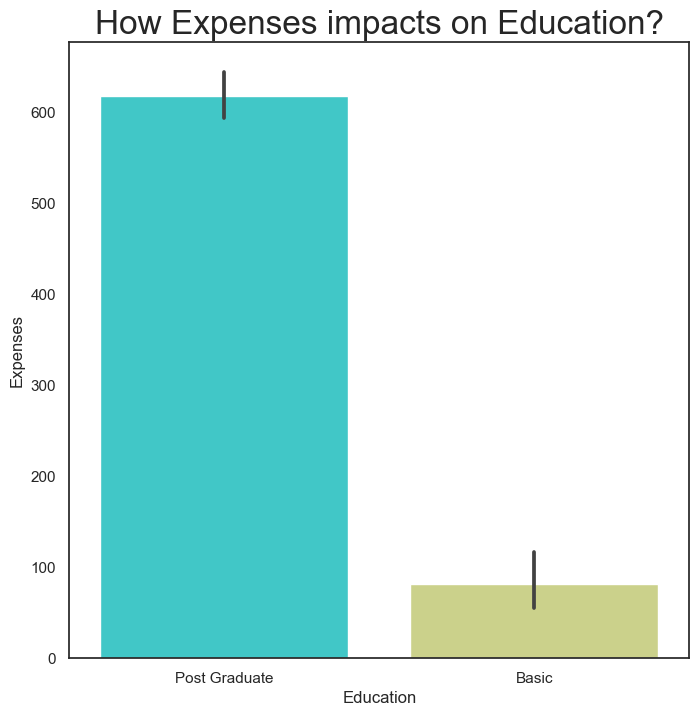

In [162]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Expenses impacts on Education?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=d,palette="rainbow")

### 2.Marital status vs Expenses

In [163]:
pd.crosstab(d['Marital_Status'],d['Expenses'],margins=True).style.background_gradient(cmap='Blues')


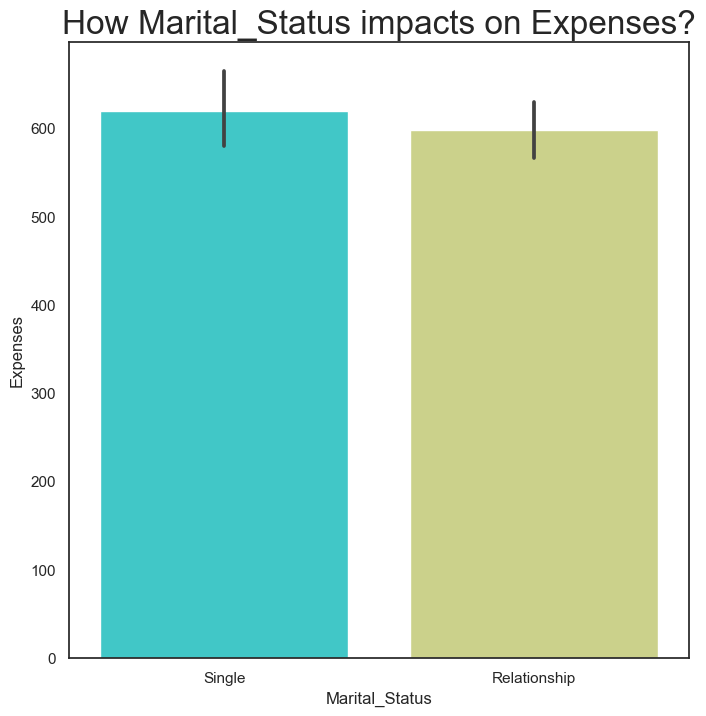

In [164]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=d,palette="rainbow")

### 3.Kids vs Expenses

In [165]:
pd.crosstab(d['Kids'],d['Expenses'],margins=True).style.background_gradient(cmap='Blues')

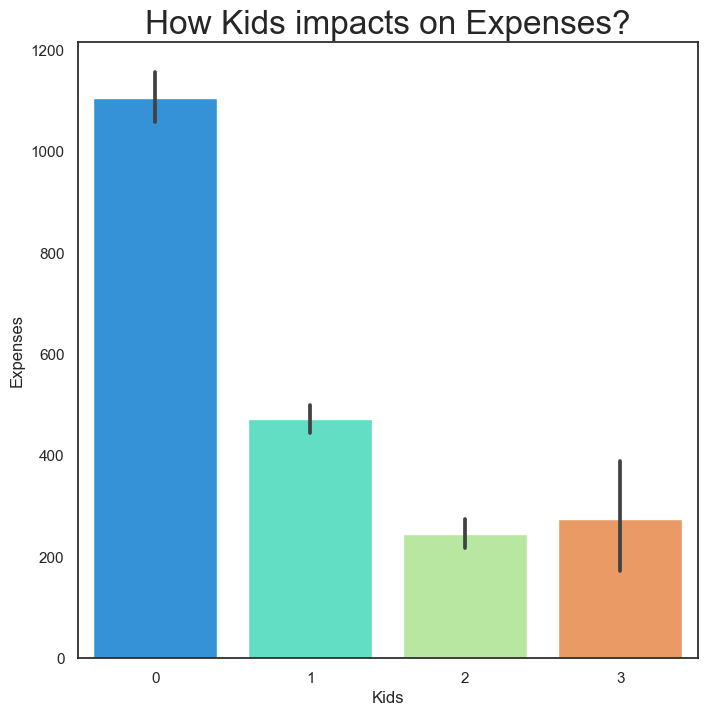

In [166]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Kids impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Kids", y="Expenses", data=d,palette="rainbow")

### 4.TotalAcceptedCmp vs Expenses

In [167]:
pd.crosstab(d['TotalAcceptedCmp'],d['Expenses'],margins=True).style.background_gradient(cmap='Blues')

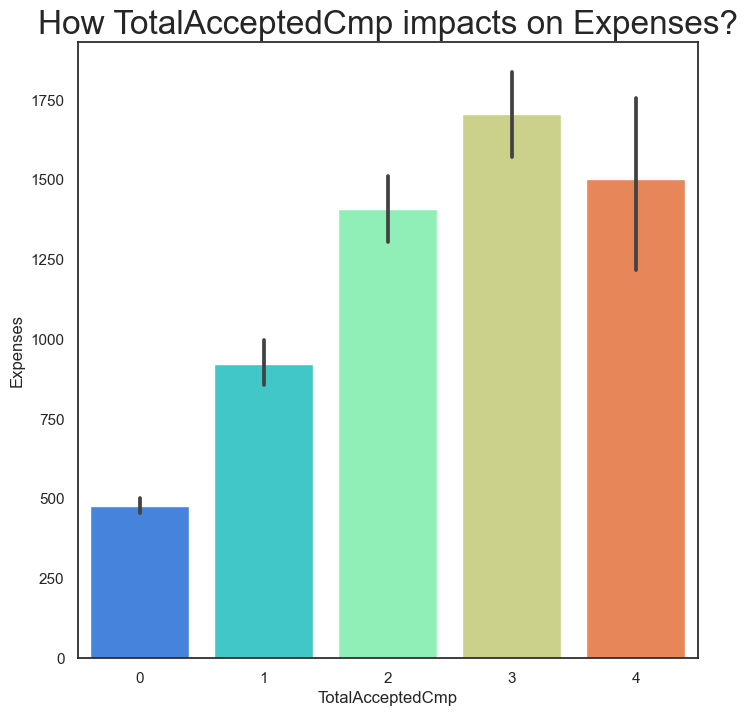

In [168]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How TotalAcceptedCmp impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="TotalAcceptedCmp", y="Expenses", data=d,palette="rainbow")

### 5.NumTotalPurchases vs Expenses

In [169]:
pd.crosstab(d['NumTotalPurchases'],d['Expenses'],margins=True).head().style.background_gradient(cmap='Blues')

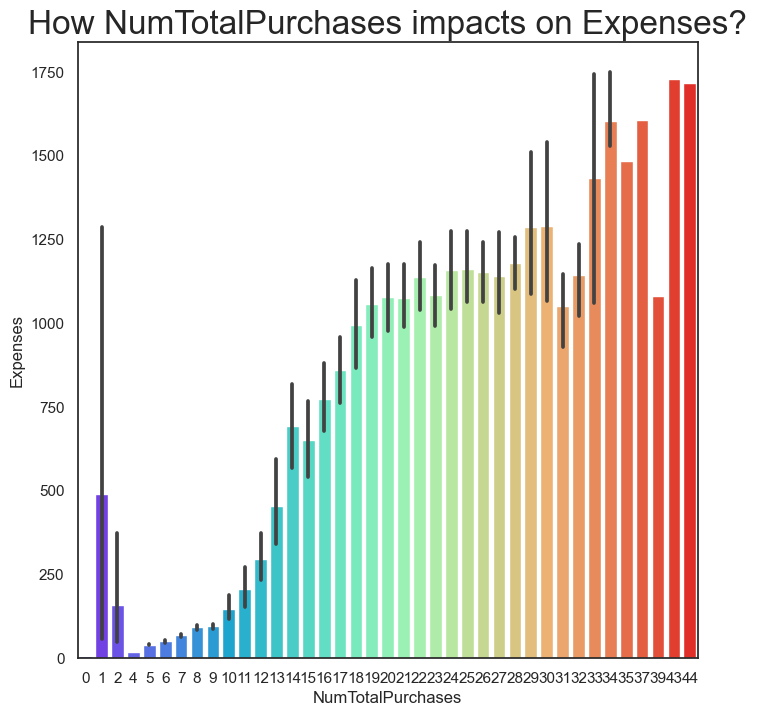

In [170]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How NumTotalPurchases impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="NumTotalPurchases", y="Expenses", data=d,palette="rainbow")

### 6.Day enageged vs Expenses

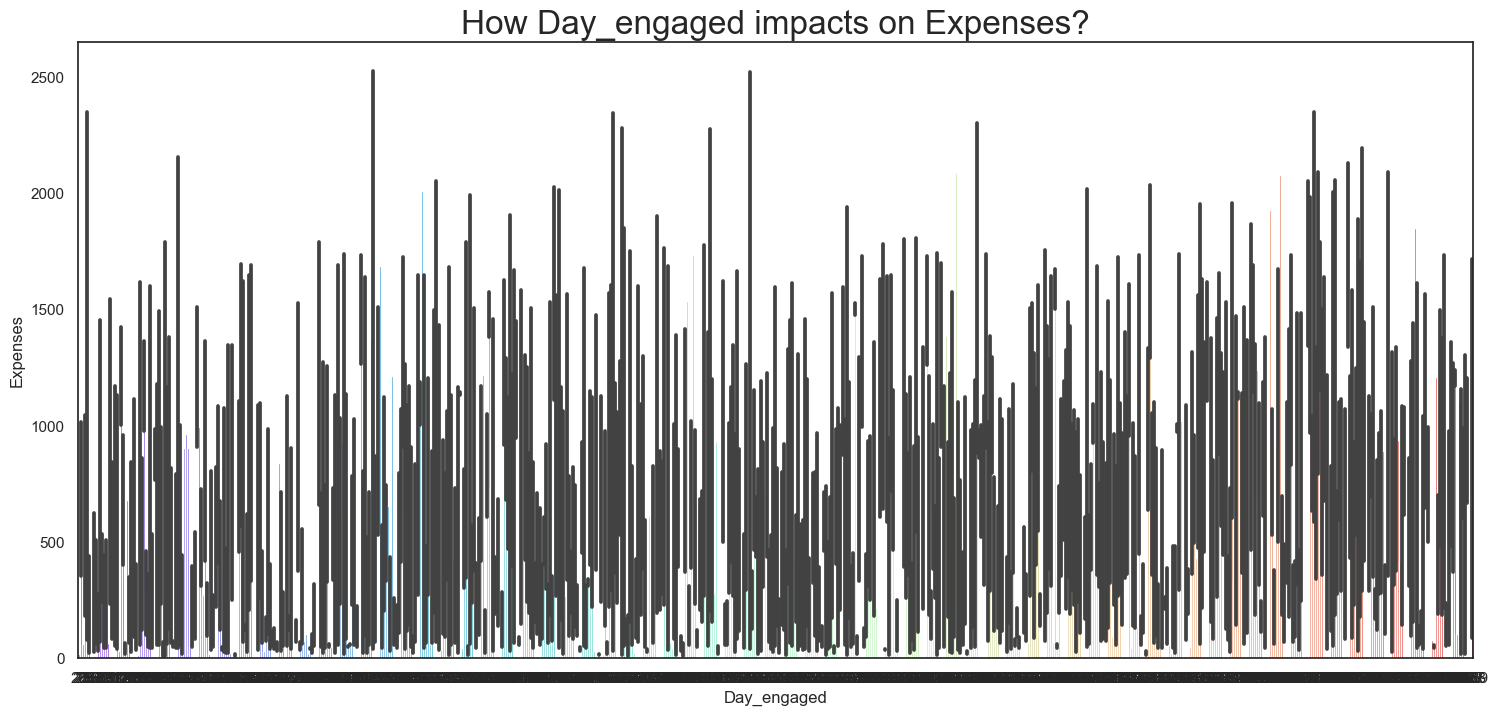

In [171]:
sns.set_theme(style="white")
plt.figure(figsize=(18,8))
plt.title("How Day_engaged impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Day_engaged", y="Expenses", data=d,palette="rainbow")

### 7.Age vs Expenses

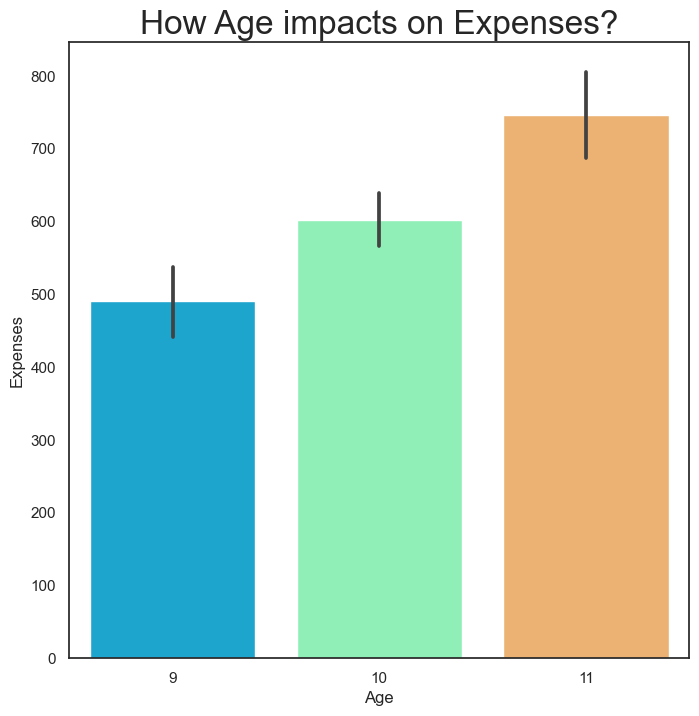

In [172]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Age impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Age", y="Expenses", data=d,palette="rainbow")

In [173]:
d.head(5).style.background_gradient(cmap='Blues')

## Finding the correlation:-

<AxesSubplot:>

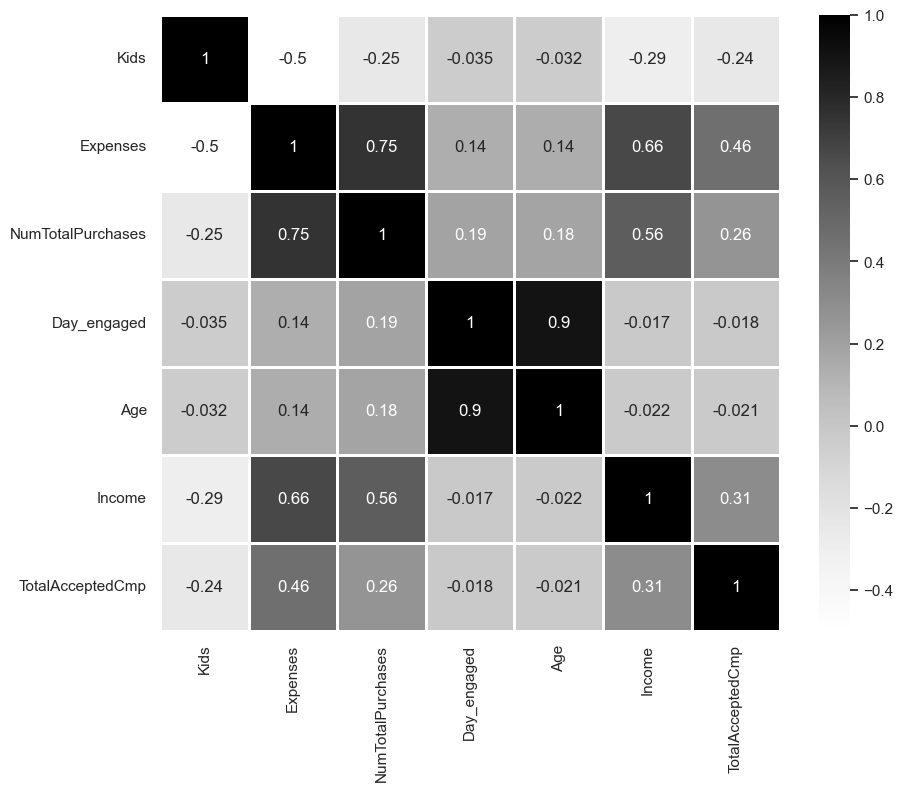

In [174]:
plt.figure(figsize=(10,8))
sns.heatmap(d.corr(), annot=True,cmap = 'Greys',linewidths=1)

**_NOTE:  
Highest correlation between the features is 0.75.  
Day_engaged and Age has the lowest correlation with expenses,almost reaching 0.14 while NumTotalPurchases has the highest correlation with the expenses_**  

In [175]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Kids               2240 non-null   int64  
 3   Expenses           2240 non-null   int64  
 4   NumTotalPurchases  2240 non-null   int64  
 5   Day_engaged        2240 non-null   int64  
 6   Age                2240 non-null   int64  
 7   Income             2240 non-null   float64
 8   TotalAcceptedCmp   2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


There are two categorical feature column Education and  Marital_Status

In [176]:
d['Education'].value_counts()

Post Graduate    2186
Basic              54
Name: Education, dtype: int64

In [177]:
d['Marital_Status'].value_counts()

Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [178]:
#Label encoding for categorical feature 'Education'
from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()
d['Education']=lbl_encode.fit_transform(d['Education'])
d['Education'].value_counts()

1    2186
0      54
Name: Education, dtype: int64

0-->Post Graduate  
1-->Basic 

In [179]:
#Label encoding for categorical feature 'Marital_Status'
d['Marital_Status']=lbl_encode.fit_transform(d['Marital_Status'])
d['Marital_Status'].value_counts()

0    1444
1     796
Name: Marital_Status, dtype: int64

0-->Relationship   
1-->Single

In [180]:
d.head().style.background_gradient(cmap='Blues')

In [181]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   int32  
 1   Marital_Status     2240 non-null   int32  
 2   Kids               2240 non-null   int64  
 3   Expenses           2240 non-null   int64  
 4   NumTotalPurchases  2240 non-null   int64  
 5   Day_engaged        2240 non-null   int64  
 6   Age                2240 non-null   int64  
 7   Income             2240 non-null   float64
 8   TotalAcceptedCmp   2240 non-null   int64  
dtypes: float64(1), int32(2), int64(6)
memory usage: 140.1 KB


All the features are converted into numercal form.

In [182]:
#Taking a copy for standard scaling
d1=d.copy()
d1.head().style.background_gradient(cmap='Blues')

In [183]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(d1.values)
sf_df = pd.DataFrame(scaled_features, index=d1.index, columns=d1.columns)
sf_df.head().style.background_gradient(cmap='Blues')

In [184]:
X = sf_df.iloc[:, [7, 3]].values
print(X)

[[ 0.23569584  1.67941681]
 [-0.23545419 -0.96127545]
 [ 0.77399892  0.28267329]
 ...
 [ 0.18947568  1.05495122]
 [ 0.67940139  0.39394775]
 [ 0.02520835 -0.7204576 ]]


# Elbow Method - To Find The Number Of Clusters :-

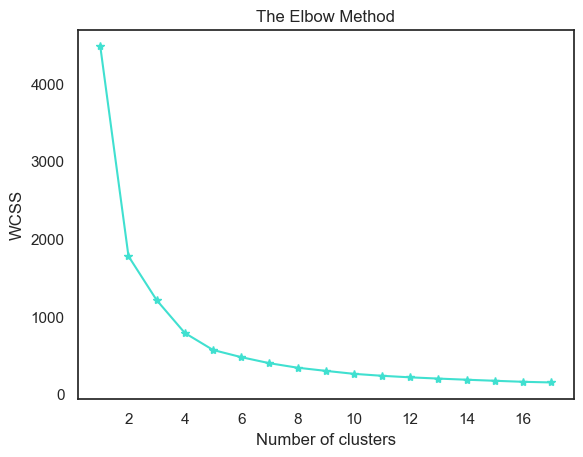

In [185]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss,color = "turquoise",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The aburbt change in the curve happened at cluster 2.So we shall assume 'k' value as 2.

# K-Means Clustering:

In [186]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters =2 , init = 'k-means++', random_state = 50)
y_kmeans = kmeans.fit_predict(X)

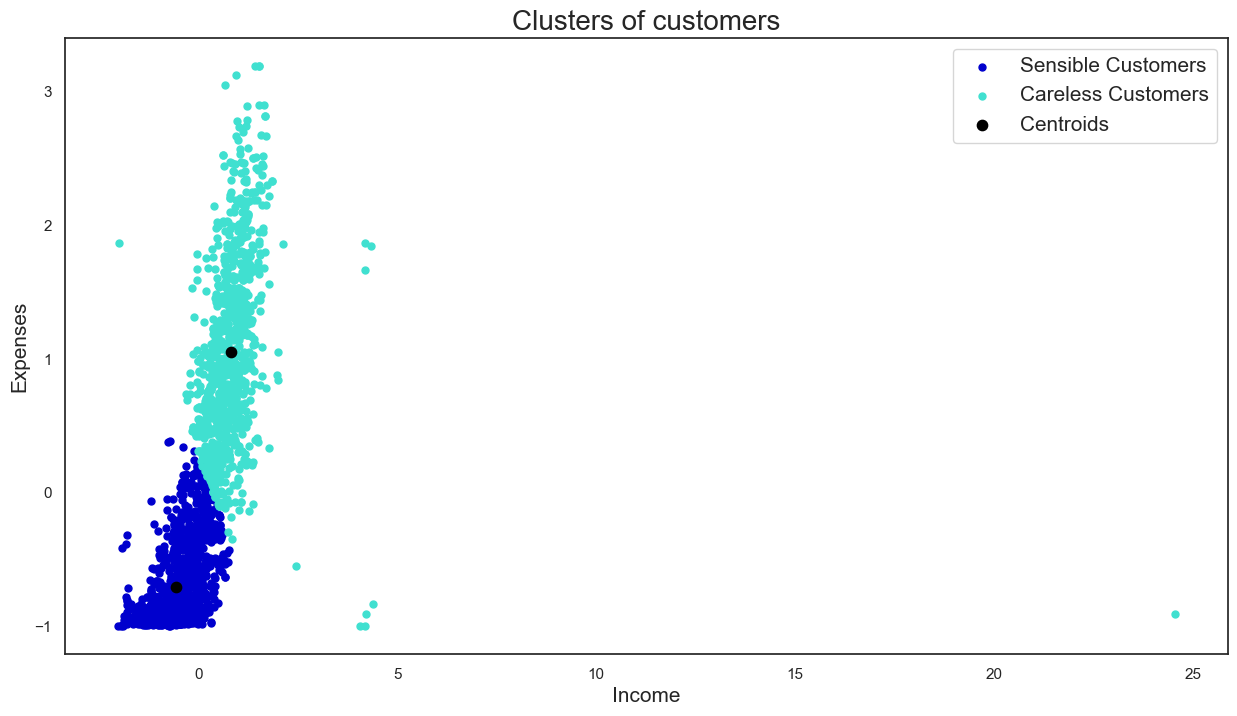

In [187]:
# Visualising the clusters
plt.figure(figsize= (15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'mediumblue', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'turquoise', label = 'Careless Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

**_NOTE:  
Customer who has Low income and Low Expenses are Sensible customers.  
Customer who has Low income and High Expenses are Careless customers._**  

# FINAL SUMMARY

**_ The highest Birth rate of customers is 87.  
 97.58% of the customers are "Post graduated"  
 More than half of the customers are in a relationship - 64.46%.  
 Minimum Expenses - 5.  
 Maximum Expenses - 2525.  
 Mean Expenses - 605.7982.  
 79.33% of the customers who accepted the offer in the campaign is 0.  
 Minimum NumTotalPurchases - 0  
 Maximum NumTotalPurchases - 44  
 Mean NumTotalPurchases - 14.8620.    
 Minimum Income - 1730.  
 Maximum Income - 666666.  
 Mean Income - 52237.9754.  
 The highest Expenses rate for Post Graduated Customers is 97.58%.  
 The highest Expenses rate for Customers who are in a Relationship is 64.46%.  
 The highest Expenses rate for Customers who have one Kid is 50.35%.  
 The highest Expenses rate for Customers who accepted the offer in the campaign "0" is 79.33%.  
 The highest Expenses rate for 8 years old Customers is 53.08%.<\b>_**  